In [1]:
import pandas as pd
import numpy as np

# Primary Dataset: News Headlines and Analyst Ratings Headlines

This is the data retrieval, exploration, cleaning and manipulation of the Primary Dataset.
In the dataset, there are 2 csv: News Headlines "raw_partner_headlines.csv" which is imported into "hl"; and Analyst Ratings Headlines which is imported into "an".

## New Headlines

In [2]:
hl = pd.read_csv('raw_partner_headlines.csv')
len(hl)

1845559

In [3]:
len(hl.stock.unique())

6552

In [4]:
hl.head()

Unnamed: 0                                           headline  \
0           2  Agilent Technologies Announces Pricing of $5……...   
1           3  Agilent (A) Gears Up for Q2 Earnings: What's i...   
2           4  J.P. Morgan Asset Management Announces Liquida...   
3           5  Pershing Square Capital Management, L.P. Buys ...   
4           6  Agilent Awards Trilogy Sciences with a Golden ...   

                                                 url  publisher  \
0  http://www.gurufocus.com/news/1153187/agilent-...  GuruFocus   
1  http://www.zacks.com/stock/news/931205/agilent...      Zacks   
2  http://www.gurufocus.com/news/1138923/jp-morga...  GuruFocus   
3  http://www.gurufocus.com/news/1138704/pershing...  GuruFocus   
4  http://www.gurufocus.com/news/1134012/agilent-...  GuruFocus   

                  date stock  
0  2020-06-01 00:00:00     A  
1  2020-05-18 00:00:00     A  
2  2020-05-15 00:00:00     A  
3  2020-05-15 00:00:00     A  
4  2020-05-12 00:00:00     A

## Analyst Ratings

In [5]:
an = pd.read_csv('raw_analyst_ratings.csv')
an.tail()

Unnamed: 0                                           headline  \
1407323     1413844             Top Narrow Based Indexes For August 29   
1407324     1413845  Recap: Wednesday's Top Percentage Gainers and ...   
1407325     1413846  UPDATE: Oppenheimer Color on China Zenix Auto ...   
1407326     1413847  Oppenheimer Initiates China Zenix At Outperfor...   
1407327     1413848  China Zenix Auto International Opens For Tradi...   

                                                       url       publisher  \
1407323  https://www.benzinga.com/news/11/08/1888782/to...   Monica Gerson   
1407324  https://www.benzinga.com/news/earnings/11/06/1...    Benjamin Lee   
1407325  https://www.benzinga.com/analyst-ratings/analy...  BenzingaStaffL   
1407326  https://www.benzinga.com/analyst-ratings/price...       Joe Young   
1407327  https://www.benzinga.com/news/ipos/11/05/10789...   Allie Wickman   

                        date stock  
1407323  2011-08-29 00:00:00    ZX  
1407324  2011-06-22 00:00:00    ZX  
1407325  2011-06-21 00:00:00    ZX  
1407326  2011-06-21 00:00:00    ZX  
1407327  2011-05-12 00:00:00    ZX

In [6]:
len(an)

1407328

In [7]:
len(an.stock.unique())

6204

## Dow Jones Index

We filter out companies to include by only including Dow Jones Index Companies - most well known companies.
The stock list of the index is downloaded from https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average

In [8]:
# https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average
dow_table = """Apple Inc.	NASDAQ	AAPL	Information technology	2015-03-19		2.57%
Amgen	NASDAQ	AMGN	Pharmaceutical industry	2020-08-31		4.87%
American Express	NYSE	AXP	Financial services	1982-08-30		2.88%
Boeing	NYSE	BA	Aerospace and defense	1987-03-12		4.92%
Caterpillar Inc.	NYSE	CAT	Construction and Mining	1991-05-06		4.54%
Salesforce	NYSE	CRM	Information technology	2020-08-31		4.45%
Cisco Systems	NASDAQ	CSCO	Information technology	2009-06-08		1.00%
Chevron Corporation	NYSE	CVX	Petroleum industry	2008-02-19	Also 1930-07-18 to 1999-11-01	2.03%
The Walt Disney Company	NYSE	DIS	Broadcasting and entertainment	1991-05-06		3.66%
Dow Inc.	NYSE	DOW	Chemical industry	2019-04-02		1.25%
Goldman Sachs	NYSE	GS	Financial services	2013-09-20		6.54%
The Home Depot	NYSE	HD	Retailing	1999-11-01		6.24%
Honeywell	NASDAQ	HON	Conglomerate	2020-08-31		4.47%
IBM	NYSE	IBM	Information technology	1979-06-29	Also 1932-05-26 to 1939-03-04	2.59%
Intel	NASDAQ	INTC	Information technology	1999-11-01		1.25%
Johnson & Johnson	NYSE	JNJ	Pharmaceutical industry	1997-03-17		3.12%
JPMorgan Chase	NYSE	JPM	Financial services	1991-05-06		2.95%
The Coca-Cola Company	NYSE	KO	Food industry	1987-03-12	Also 1932-05-26 to 1935-11-20	1.04%
McDonald's	NYSE	MCD	Food industry	1985-10-30		4.49%
3M	NYSE	MMM	Conglomerate	1976-08-09	As Minnesota Mining and Manufacturing	3.84%
Merck & Co.	NYSE	MRK	Pharmaceutical industry	1979-06-29		1.49%
Microsoft	NASDAQ	MSFT	Information technology	1999-11-01		4.98%
Nike, Inc.	NYSE	NKE	Apparel	2013-09-20		2.58%
Procter & Gamble	NYSE	PG	Fast-moving consumer goods	1932-05-26		2.64%
The Travelers Companies	NYSE	TRV	Financial services	2009-06-08		3.03%
UnitedHealth Group	NYSE	UNH	Managed health care	2012-09-24		7.33%
Visa Inc.	NYSE	V	Financial services	2013-09-20		4.33%
Verizon Communications	NYSE	VZ	Telecommunication	2004-04-08		1.13%
Walgreens Boots Alliance	NASDAQ	WBA	Retailing	2018-06-26		1.06%
Walmart	NYSE	WMT	Retailing	1997-03-17		2.72%""".split("\n")

In [9]:
dow = []
for row in dow_table:
    dow.append(row.split("\t")[2])

## Check Number of Headlines and Analyst Ratings per stock

In [10]:
# Headlines and Ratings of Stocks in the Dow
hl_dow = hl[hl.stock.isin(dow)]
an_dow = an[an.stock.isin(dow)]

In [11]:
# Check number of news headlines and ratings headlines
# the column headline is the count for News Headlines.  The column ratings is the count of Analyst Ratings Headlines.
counts = pd.DataFrame([hl_dow.groupby('stock')['headline'].agg(len),
                       an_dow.groupby('stock')['headline'].agg(len).rename('ratings')]).transpose()
counts

headline  ratings
AAPL      32.0    441.0
AMGN       9.0    150.0
AXP     1926.0   1857.0
CAT        7.0   2322.0
CRM        5.0   1483.0
CSCO     508.0   1010.0
DIS      933.0     10.0
DOW     2418.0   1227.0
HD      1841.0   2612.0
IBM        2.0   1090.0
INTC    2465.0     10.0
JPM     2873.0     10.0
KO        77.0   2797.0
MCD        8.0   2228.0
MMM        6.0   1489.0
MRK        2.0   3333.0
PG         7.0   1305.0
TRV     2203.0    656.0
UNH      170.0    230.0
V         28.0     10.0
VZ         6.0   2966.0
WBA     1375.0   1194.0
WMT        1.0     10.0
BA         NaN     10.0
JNJ        NaN   2928.0

In [12]:
# Only include stocks with >10 headlines & >10 ratings for analysis to get more significant
# results with larger numbers of headlines and ratings.

dow_incl = counts[(counts['headline']>10) & (counts['ratings']>10)].index
dow_incl

Index(['AAPL', 'AXP', 'CSCO', 'DOW', 'HD', 'KO', 'TRV', 'UNH', 'WBA'], dtype='object')

In [13]:
counts.loc[dow_incl,:]

headline  ratings
AAPL      32.0    441.0
AXP     1926.0   1857.0
CSCO     508.0   1010.0
DOW     2418.0   1227.0
HD      1841.0   2612.0
KO        77.0   2797.0
TRV     2203.0    656.0
UNH      170.0    230.0
WBA     1375.0   1194.0

In [14]:
# Filtering these stocks in hl and an
# These contain the data to analyze
headlines = hl[hl.stock.isin(dow_incl)]
ratings = an[an.stock.isin(dow_incl)]

## Check Date Range

Convert date column of the dataset to datetime data type.

In [15]:
from datetime import datetime

In [16]:
def time_conv(x):
    if pd.isnull(x):
        return np.nan
    else:
        try:
            return datetime.strptime(str(x)[:10], "%Y-%m-%d") # %H:%M:%S")
        except:
            return np.nan

In [17]:
headlines.loc[:,'date'] = headlines.date.map(time_conv)
ratings.loc[:,'date'] = ratings.date.map(time_conv)


headlines_dates = headlines.groupby('stock')['date'].agg([min, max])
headlines_dates = headlines_dates.merge(ratings.groupby('stock')['date'].agg([min, max]), left_index=True, right_index=True, suffixes=['_headlines','_ratings'])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [18]:
headlines_dates

min_headlines max_headlines min_ratings max_ratings
stock                                                    
AAPL     2020-05-27    2020-06-02  2020-03-09  2020-06-10
AXP      2016-04-20    2020-06-03  2009-08-07  2020-06-10
CSCO     2019-11-07    2020-06-01  2016-08-17  2020-06-10
DOW      2010-03-01    2020-06-03  2009-08-25  2020-06-09
HD       2018-04-23    2020-06-04  2009-08-10  2020-06-10
KO       2020-04-29    2020-06-03  2009-06-22  2020-06-11
TRV      2010-03-05    2020-05-29  2009-10-22  2020-06-11
UNH      2020-04-03    2020-06-04  2019-07-08  2020-06-11
WBA      2018-03-23    2020-05-27  2014-12-31  2020-06-08

Most stocks have data ending May or June 2020.
Some stocks have data starting late 2019 or 2020 only, will exclude these and only include stocks with data starting prior to 2019 only
This gives roughly 1.5 years of data minimum

In [19]:
min_date = datetime.strptime("2019-01-01", "%Y-%m-%d")

headlines_dates = headlines_dates[(headlines_dates.min_headlines < min_date) &
                                  (headlines_dates.min_ratings < min_date)]
headlines_dates

min_headlines max_headlines min_ratings max_ratings
stock                                                    
AXP      2016-04-20    2020-06-03  2009-08-07  2020-06-10
DOW      2010-03-01    2020-06-03  2009-08-25  2020-06-09
HD       2018-04-23    2020-06-04  2009-08-10  2020-06-10
TRV      2010-03-05    2020-05-29  2009-10-22  2020-06-11
WBA      2018-03-23    2020-05-27  2014-12-31  2020-06-08

Update analysis universe

In [20]:
# Update analysis universe
dow_incl = headlines_dates.index

headlines = headlines[headlines.stock.isin(dow_incl)]
ratings = ratings[ratings.stock.isin(dow_incl)]

## Sentiment scores on headlines and ratings

In [21]:
import nltk 
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [22]:
# Instantiate the sentiment intensity analyzer with the existing lexicon
vader = SentimentIntensityAnalyzer()

# check the distribution of the lexicon and sentiment values
pd.Series(vader.lexicon).describe()

count    7502.000000
mean       -0.181938
std         1.700843
min        -3.900000
25%        -1.600000
50%        -0.500000
75%         1.500000
max         3.400000
dtype: float64

## Add some word and sentiment values
For financial use case we need more specific words: manually add

In [23]:
# https://www.kaggle.com/mmmarchetti/sentiment-analysis-on-financial-news
# New words and values
new_words = {
    'crushes': -1.9,
    'beats': 1,
    'misses': -1,
    'trouble': -1.7,
    'falls': -1.5,
    'dovish': 0.5,
    'hawkish': -0.5
}

In [24]:
# Check values:
for word in new_words.keys():
    try: 
        print(word, vader.lexicon[word])
    except:
        pass

crushes -1.9
misses -0.9
trouble -1.7


In [25]:
lex = pd.Series(vader.lexicon)
lex[lex>0].mean()

1.5313531353135323

In [26]:
lex[lex<0].mean()

-1.5516670664427912

### Add words from a word list:
As suggested by classmate Stuart Ong from peer review of proposal, we added words from https://sraf.nd.edu/textual-analysis/resources/ .
There are positive and negative word lists but no values attached, we will add them with the mean positive and negative scores of the existing lexicon.

In [27]:
# https://sraf.nd.edu/textual-analysis/resources/
# Suggested by classmate Stuart Ong from peer review of proposal
word_list_pos = pd.read_excel('LoughranMcDonald_SentimentWordLists_2018.xlsx', sheet_name='Positive', 
                              header=None)[0].map(lambda x: x.lower())
word_list_neg= pd.read_excel('LoughranMcDonald_SentimentWordLists_2018.xlsx', sheet_name='Negative', 
                              header=None)[0].map(lambda x: x.lower())

In [28]:
# Add the missing words to the vader lexicon with the mean values
words_pos = pd.DataFrame(word_list_pos[~word_list_pos.isin(lex.index)])
words_pos['score']=lex[lex>0].mean()
dict_words_pos = words_pos.set_index(0)['score'].to_dict()

words_neg = pd.DataFrame(word_list_neg[~word_list_neg.isin(lex.index)])
words_neg['score']=lex[lex<0].mean()
dict_words_neg = words_neg.set_index(0)['score'].to_dict()

In [29]:
# Update the lexicon
vader.lexicon.update(new_words)
vader.lexicon.update(dict_words_pos)
vader.lexicon.update(dict_words_neg)

## Put sentiment scores in the headlines and ratings

In [30]:
pd.options.display.max_colwidth =300
pd.options.display.max_rows =100

In [31]:
def add_scores(df, text_col_name):
#     try:
#         df.drop(score_column, axis=1, inplace=True)
#     except:
#         pass
    scores = df[text_col_name].apply(vader.polarity_scores)
    for item in scores.iteritems():
        item[1]['index'] = item[0]
        
    scores = pd.DataFrame.from_records(scores.reset_index()[text_col_name], index='index')
    df = df.join(scores)
    
    return df, scores

In [32]:
headlines, hl_scores = add_scores(headlines, 'headline')
ratings, ratings_scores = add_scores(ratings, 'headline')

In [33]:
# Helper function to filter the scores by stock from the headlines and ratings dfs.

def get_score_df(df, stock):
    df.date = pd.to_datetime(df.date)
    cols_chart = ['date', 'compound','pos','neg','neu']
    score_df = df.loc[df.stock==stock, cols_chart].set_index('date')
    return score_df

In [34]:
get_score_df(headlines,'AXP')

compound    pos    neg    neu
date                                     
2020-06-03    0.0000  0.000  0.000  1.000
2020-06-03    0.0000  0.000  0.000  1.000
2020-06-03    0.3400  0.315  0.202  0.484
2020-06-02    0.0000  0.000  0.000  1.000
2020-06-01    0.0000  0.000  0.000  1.000
...              ...    ...    ...    ...
2016-04-20    0.0000  0.000  0.000  1.000
2016-04-20   -0.1531  0.000  0.167  0.833
2016-04-20    0.0000  0.000  0.000  1.000
2016-04-20    0.0000  0.000  0.000  1.000
2016-04-20   -0.0391  0.219  0.233  0.548

[1926 rows x 4 columns]

# Get stock price data (yFinance)

We use yFinance package to retrieve stock prices from Yahoo Finance.
https://aroussi.com/post/python-yahoo-finance

In [35]:
import yfinance as yf

In [36]:
# list of stocks reminder
dow_incl

Index(['AXP', 'DOW', 'HD', 'TRV', 'WBA'], dtype='object', name='stock')

In [37]:
# dates we need
headlines_dates

min_headlines max_headlines min_ratings max_ratings
stock                                                    
AXP      2016-04-20    2020-06-03  2009-08-07  2020-06-10
DOW      2010-03-01    2020-06-03  2009-08-25  2020-06-09
HD       2018-04-23    2020-06-04  2009-08-10  2020-06-10
TRV      2010-03-05    2020-05-29  2009-10-22  2020-06-11
WBA      2018-03-23    2020-05-27  2014-12-31  2020-06-08

In [39]:
headlines_dates.loc[:,'start_date'] = headlines_dates[['min_headlines', 'min_ratings']].max(axis=1)
headlines_dates.loc[:,'end_date'] = headlines_dates[['max_headlines', 'max_ratings']].max(axis=1)
headlines_dates

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1783: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


min_headlines max_headlines min_ratings max_ratings start_date  \
stock                                                                  
AXP      2016-04-20    2020-06-03  2009-08-07  2020-06-10 2016-04-20   
DOW      2010-03-01    2020-06-03  2009-08-25  2020-06-09 2010-03-01   
HD       2018-04-23    2020-06-04  2009-08-10  2020-06-10 2018-04-23   
TRV      2010-03-05    2020-05-29  2009-10-22  2020-06-11 2010-03-05   
WBA      2018-03-23    2020-05-27  2014-12-31  2020-06-08 2018-03-23   

        end_date  
stock             
AXP   2020-06-10  
DOW   2020-06-09  
HD    2020-06-10  
TRV   2020-06-11  
WBA   2020-06-08

In [41]:
data = yf.download(" ".join(dow_incl), 
                   start=headlines_dates.start_date.min(), 
                      end=headlines_dates.end_date.max())

[*********************100%***********************]  5 of 5 completed


In [42]:
data_DOW = yf.download("DWDP", start="2017-01-01", end="2019-03-20")
data_DOW

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- DWDP: No data found, symbol may be delisted


Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []

The company stock DOW started 20 Mar 2019.
The company was listed as stock ticker DWDP prior to that, and went thru a merger.  It is not possible to retrieve delisted stock data from this package.  Therefore we will exclude this stock.

In [43]:
# we will drop DOW from our analysis
dow_incl = dow_incl.drop('DOW')

In [44]:
headlines_dates = headlines_dates.drop('DOW', axis=0)
headlines_dates

min_headlines max_headlines min_ratings max_ratings start_date  \
stock                                                                  
AXP      2016-04-20    2020-06-03  2009-08-07  2020-06-10 2016-04-20   
HD       2018-04-23    2020-06-04  2009-08-10  2020-06-10 2018-04-23   
TRV      2010-03-05    2020-05-29  2009-10-22  2020-06-11 2010-03-05   
WBA      2018-03-23    2020-05-27  2014-12-31  2020-06-08 2018-03-23   

        end_date  
stock             
AXP   2020-06-10  
HD    2020-06-10  
TRV   2020-06-11  
WBA   2020-06-08

We will select date period where both headlines and ratings are avaialble for analysis

Download data from yFinance again

In [45]:
px_data = yf.download(" ".join(dow_incl), 
                      start=headlines_dates.start_date.min(), 
                      end=headlines_dates.end_date.max())

[*********************100%***********************]  4 of 4 completed


In [46]:
px_data = px_data.loc[:,px_data.columns.get_level_values(0) == 'Adj Close']
px_data.columns = px_data.columns.get_level_values(1)
px_data

AXP          HD         TRV        WBA
Date                                                     
2010-03-04   32.841263   24.091663   40.552822  26.461506
2010-03-05   33.947525   24.367517   40.848156  26.453945
2010-03-08   33.533726   24.490128   40.992924  26.264942
2010-03-09   33.525291   24.456156   40.817680  26.000322
2010-03-10   33.542187   24.479322   40.299549  25.909597
...                ...         ...         ...        ...
2020-06-04  104.933197  244.767258  114.978394  42.411438
2020-06-05  108.075089  250.617279  121.175537  43.514908
2020-06-08  111.955658  252.455856  124.722321  45.117329
2020-06-09  108.794060  252.446045  123.025360  43.447739
2020-06-10  104.558922  250.174850  118.670135  42.488201

[2586 rows x 4 columns]

# Analysis of One Stock
Add headlines, ratings sentiment scores to the px_data time_series
This whole section can be rerun to produce full analysis of a stock, by changing the variable *stock_analysis* in 3.1. below and Run All Below.

## Start of Producing Analysis

In [47]:
# Possible stocks:
dow_incl

Index(['AXP', 'HD', 'TRV', 'WBA'], dtype='object', name='stock')

In [48]:
# Set the stock for subsequent analysis
stock_analysis = 'TRV'

## Visualization

In [49]:
# plot score and stock_px
import matplotlib.pyplot as plt
import altair as alt

A reusable function that can plot as a time series:
1. the stock price (as a line) or log return (as a blue dot) per stock 
2. the sentiment score (compound, pos, neg, neu scores from nltk vader)

In order to visualize the evolution of these variables over time.

In [50]:
def plot_chart(df, stock, score, color_scheme, kind='price', n_days_return=1):
    """
    df: headline or ratings df containing scores
    stock: stock name to get scores and prices from px_data
    score: ("compound", "pos", "neg", "neu")
    color_scheme: color scheme to use for score circles https://vega.github.io/vega/docs/schemes/
    """
    series_score = get_score_df(df, stock)

    start_date_chart = series_score.index.min()
    end_date_chart = series_score.index.max()

    if kind=='price':
        chart_px_data= px_data
    
        chart_px = alt.Chart(chart_px_data.reset_index()).mark_line(color='blue', clip=True).encode(
                        x=alt.X('Date', scale={'domain': [start_date_chart, end_date_chart]}),
                        y=alt.Y(stock)
                        )

    elif kind=='return':
        px_data_log = np.log(px_data.shift(-n_days_return) / px_data)
        chart_px_data = px_data_log
        
        chart_px = alt.Chart(chart_px_data.reset_index()).mark_circle(color='blue', clip=True, size=20).encode(
                        x=alt.X('Date', scale={'domain': [start_date_chart, end_date_chart]}),
                        y=alt.Y(stock)
                        )
        
    chart_score = (alt.Chart(series_score.reset_index()).mark_circle(size=20)
                           .encode(
                               x=alt.X('date', scale={'domain': [start_date_chart, end_date_chart]}),
                               y=score,
                               color=alt.Color(score, scale=alt.Scale(scheme=color_scheme))
                           ))

    return ((chart_score + chart_px).resolve_scale(x='shared', y='independent')
                                .properties(height=500, width=800))

Example: 
The plot of the **compound** sentiment score from the **analyst ratings headlines** of stock and the stock price.

In [51]:
plot_chart(ratings, stock_analysis, 'compound', "redyellowgreen", 'price')

alt.LayerChart(...)

Example: 
The plot of the **compound** sentiment score from the **new headlines** of stock and the stock price.

In [52]:
plot_chart(headlines, stock_analysis, 'compound', "redyellowgreen", 'price')

alt.LayerChart(...)

Example: 
The plot of the **compound** sentiment score from the **news headlines** of stock and the **5-day returns** of the stock price.

In [53]:
plot_chart(headlines, stock_analysis, 'compound', "redyellowgreen", 'return', n_days_return=5)

alt.LayerChart(...)

Example: 
The plot of the **compound** sentiment score from the **analyst ratings headlines** of stock and the **5-day returns** of the stock price.

In [54]:
plot_chart(ratings, stock_analysis, 'compound', "redyellowgreen", 'return', n_days_return=5)

alt.LayerChart(...)

Example: 
The plot of the **positive** sentiment score from the news headlines of stock and the 1 day returns of the stock price.

In [55]:
plot_chart(headlines, stock_analysis, 'pos', 'yellowgreen', 'return', n_days_return=5)

alt.LayerChart(...)

Example: 
The plot of the **negative** sentiment score from the **analyst ratings headlines** of stock and the **5 day returns** of the stock price.

In [56]:
plot_chart(ratings, stock_analysis, 'neg', 'yelloworangered', 'return', n_days_return=5)

alt.LayerChart(...)

## Correlation analysis of sentiment and stock price returns

Helper function to retrieve the time series of sentiment scores, log returns of 1, 3, 5, 10, 20 days of a stock from a headline df (news headlines or analyst ratings).

In [57]:
def get_analysis(df, stock):
    """
    df: headline or ratings df containing scores
    stock: stock name to get scores and prices from px_data
    score: ("compound", "pos", "neg", "neu")
    """
    series_score = get_score_df(df, stock)
    
    # 1d return: the return 1 day from the day we got the headline
    px_data_log = np.log(px_data.shift(-1) / px_data)
    
    # trim dates
    start_date_chart = series_score.index.min()
    end_date_chart = series_score.index.max()
    px_data_log = px_data_log.loc[start_date_chart: end_date_chart, stock]
    px_data_log.rename('log_return', inplace=True)
    
    # merge filter date range and stock
    res = series_score.merge(px_data_log, how='right', left_index=True, right_index=True).fillna(0)
    res = res.groupby(res.index).agg(np.mean)
    
    # from documentation of headlines data source, we should shift 1 day for publication of the news
    res.loc[:,['compound', 'pos', 'neg', 'neu']] = res.loc[:,['compound', 'pos', 'neg', 'neu']].shift(1)
    
    # add other period returns
    # numerator: I received the news on this day, what is the return N days from now?
    for shift in [3,5,10,20]:
        px_return_shift = np.log(px_data.shift(-shift) / px_data)
        res.loc[:, 'log_return_' + str(shift)] = px_return_shift.loc[res.index, stock]
    
    return res

In [58]:
result= get_analysis(headlines, stock_analysis)

# pd.options.display.max_rows=None
# result

### Simple SPLOM

<ipython-input-59-66d8f73da123>:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  pd.plotting.scatter_matrix(result, ax=ax)


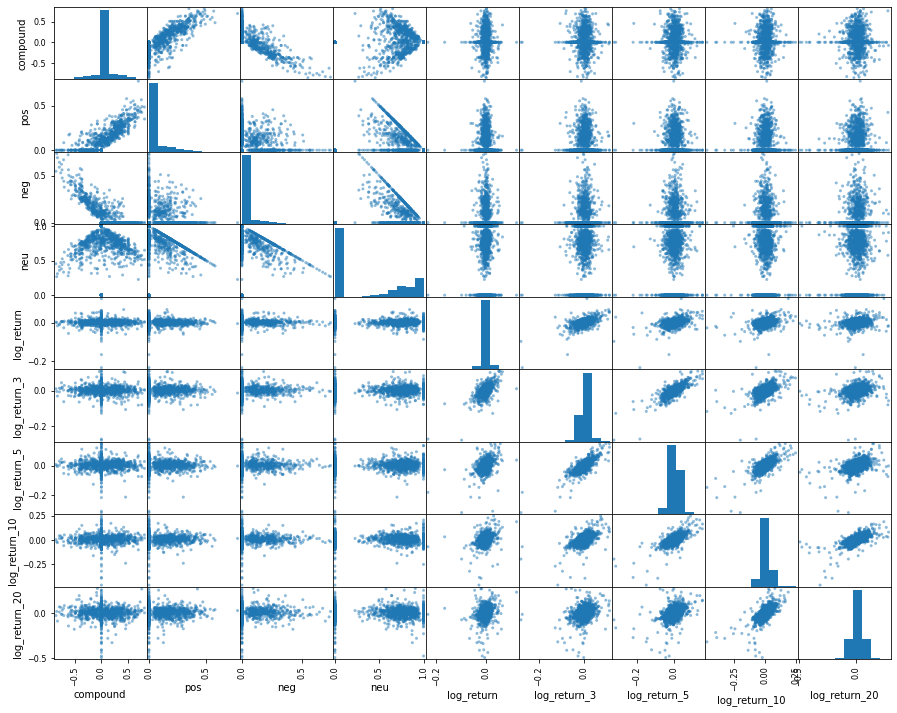

In [59]:
fig, ax = plt.subplots(1,1)
pd.plotting.scatter_matrix(result, ax=ax)
fig.set_size_inches(15, 12)

In [60]:
def slim_corr(result):
    return result.corr()[['compound','pos','neg','neu']].drop(['compound','pos','neg','neu'], axis=0)

In [61]:
slim_corr(result)

compound       pos       neg       neu
log_return     0.000788 -0.004762  0.003746  0.007719
log_return_3  -0.006797  0.005521  0.020218  0.018318
log_return_5   0.002064  0.011517  0.014736  0.022675
log_return_10  0.018400  0.024130  0.010267  0.015283
log_return_20 -0.002329  0.022738  0.031726  0.010929

## Analysis with separating Positive return days vs Negative return days to Correlate with scores

### Filter by Postive and Negative returns days separately

Helper function to filter returns

In [62]:
def filter_return(result, side):
    if side == 'pos':
        r = pd.concat((result[['compound', 'pos', 'neg', 'neu']],
                   result.log_return[result.log_return>0],
                   result.log_return_3[result.log_return_3>0],
                   result.log_return_5[result.log_return_5>0],
                   result.log_return_10[result.log_return_10>0],
                   result.log_return_20[result.log_return_20>0]), axis=1)
    if side == 'neg':
        r = pd.concat((result[['compound', 'pos', 'neg', 'neu']],
                   result.log_return[result.log_return<0],
                   result.log_return_3[result.log_return_3<0],
                   result.log_return_5[result.log_return_5<0],
                   result.log_return_10[result.log_return_10<0],
                   result.log_return_20[result.log_return_20<0]), axis=1)
    return r
pos_return = filter_return(result, 'pos')
neg_return = filter_return(result, 'neg')

<ipython-input-63-56b99997886e>:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  pd.plotting.scatter_matrix(pos_return, ax=ax)


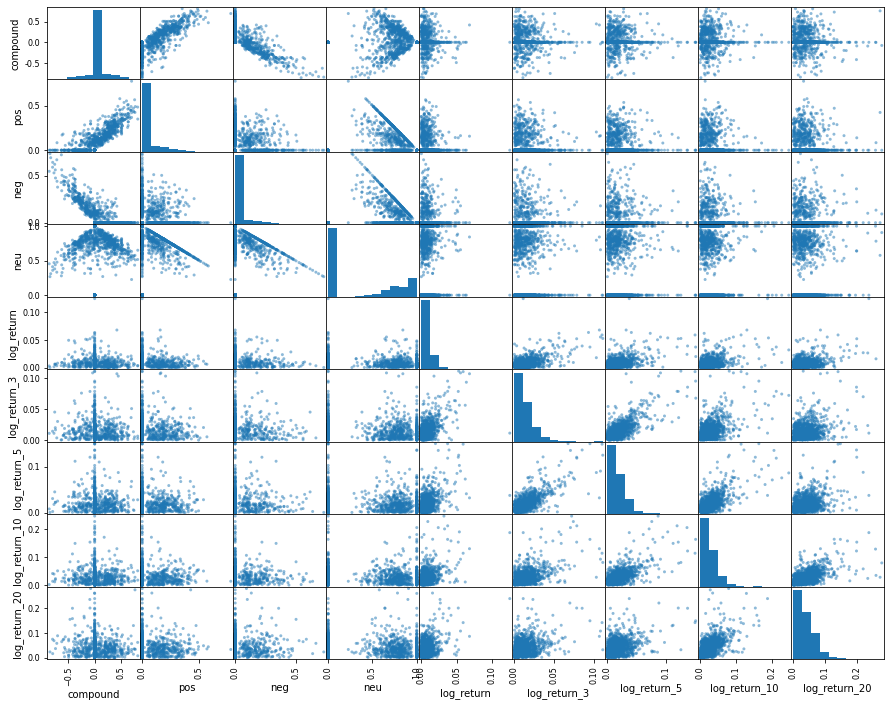

In [63]:
fig, ax = plt.subplots(1,1)
pd.plotting.scatter_matrix(pos_return, ax=ax)
fig.set_size_inches(15, 12)

<ipython-input-64-d4c50c116e19>:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  pd.plotting.scatter_matrix(neg_return, ax=ax)


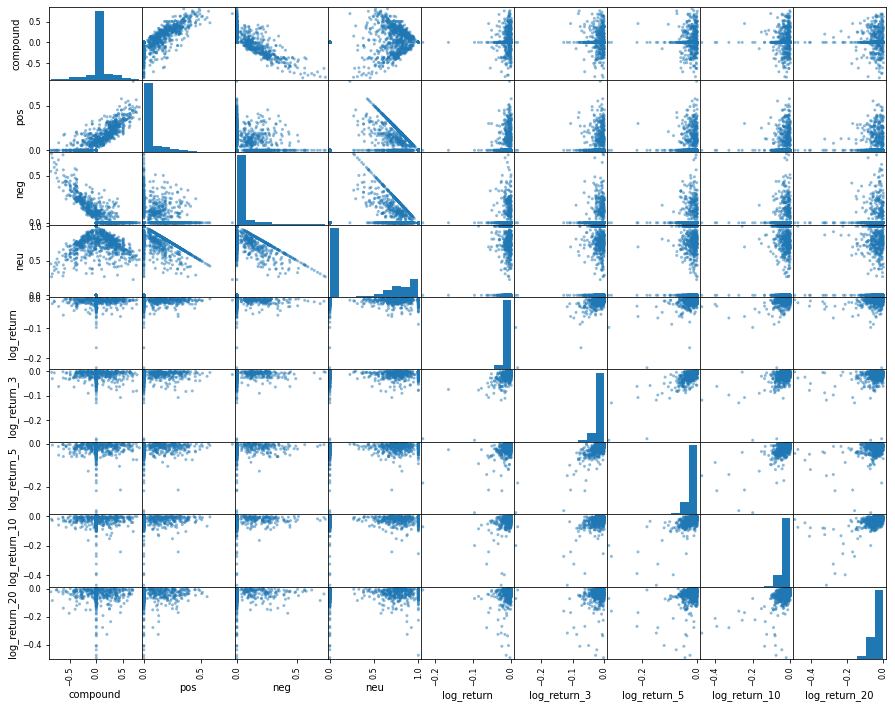

In [64]:
fig, ax = plt.subplots(1,1)
pd.plotting.scatter_matrix(neg_return, ax=ax)
fig.set_size_inches(15, 12)

In [65]:
pos_return.corr()

compound       pos       neg       neu  log_return  \
compound       1.000000  0.709322 -0.588701  0.122362   -0.031399   
pos            0.709322  1.000000  0.082345  0.370068   -0.012398   
neg           -0.588701  0.082345  1.000000  0.255621    0.034170   
neu            0.122362  0.370068  0.255621  1.000000    0.040399   
log_return    -0.031399 -0.012398  0.034170  0.040399    1.000000   
log_return_3  -0.001067  0.024545  0.039342  0.040023    0.563962   
log_return_5   0.000929  0.020102  0.031868  0.045906    0.466543   
log_return_10  0.008352  0.012759  0.016370  0.052656    0.409511   
log_return_20 -0.028100  0.015209  0.057652  0.012099    0.352998   

               log_return_3  log_return_5  log_return_10  log_return_20  
compound          -0.001067      0.000929       0.008352      -0.028100  
pos                0.024545      0.020102       0.012759       0.015209  
neg                0.039342      0.031868       0.016370       0.057652  
neu                0.040023      0.045906       0.052656       0.012099  
log_return         0.563962      0.466543       0.409511       0.352998  
log_return_3       1.000000      0.732302       0.513559       0.304918  
log_return_5       0.732302      1.000000       0.660048       0.386937  
log_return_10      0.513559      0.660048       1.000000       0.567261  
log_return_20      0.304918      0.386937       0.567261       1.000000

In [66]:
neg_return.corr()

compound       pos       neg       neu  log_return  \
compound       1.000000  0.709322 -0.588701  0.122362    0.036324   
pos            0.709322  1.000000  0.082345  0.370068    0.021576   
neg           -0.588701  0.082345  1.000000  0.255621   -0.023037   
neu            0.122362  0.370068  0.255621  1.000000   -0.018498   
log_return     0.036324  0.021576 -0.023037 -0.018498    1.000000   
log_return_3  -0.026451 -0.004775  0.023471  0.020375    0.672950   
log_return_5   0.000416  0.004769  0.003857  0.008125    0.478439   
log_return_10  0.003619  0.021542  0.026563  0.017757    0.330317   
log_return_20 -0.009328  0.003318  0.020498 -0.014349    0.141462   

               log_return_3  log_return_5  log_return_10  log_return_20  
compound          -0.026451      0.000416       0.003619      -0.009328  
pos               -0.004775      0.004769       0.021542       0.003318  
neg                0.023471      0.003857       0.026563       0.020498  
neu                0.020375      0.008125       0.017757      -0.014349  
log_return         0.672950      0.478439       0.330317       0.141462  
log_return_3       1.000000      0.740887       0.496880       0.215555  
log_return_5       0.740887      1.000000       0.646186       0.327909  
log_return_10      0.496880      0.646186       1.000000       0.524352  
log_return_20      0.215555      0.327909       0.524352       1.000000

### Compare full, pos, neg returns corr per score type

Helper function to compare different score types.

In [67]:
def comp_corr(score_type='compound', result=result, pos_return=pos_return, neg_return=neg_return):
    comp_corr = pd.DataFrame(pd.Series(slim_corr(result)[score_type], name='Full Return'))
    for k,v in {'Pos Return': pos_return, 'Neg Return': neg_return}.items():
        comp_corr = comp_corr.merge(pd.Series(slim_corr(v)[score_type], name=k), 
                                    how='left', left_index=True, right_index=True)
    return comp_corr

In [68]:
comp_corr(score_type='compound')

Full Return  Pos Return  Neg Return
log_return        0.000788   -0.031399    0.036324
log_return_3     -0.006797   -0.001067   -0.026451
log_return_5      0.002064    0.000929    0.000416
log_return_10     0.018400    0.008352    0.003619
log_return_20    -0.002329   -0.028100   -0.009328

In [69]:
comp_corr(score_type='pos')

Full Return  Pos Return  Neg Return
log_return       -0.004762   -0.012398    0.021576
log_return_3      0.005521    0.024545   -0.004775
log_return_5      0.011517    0.020102    0.004769
log_return_10     0.024130    0.012759    0.021542
log_return_20     0.022738    0.015209    0.003318

In [70]:
comp_corr(score_type='neg')

Full Return  Pos Return  Neg Return
log_return        0.003746    0.034170   -0.023037
log_return_3      0.020218    0.039342    0.023471
log_return_5      0.014736    0.031868    0.003857
log_return_10     0.010267    0.016370    0.026563
log_return_20     0.031726    0.057652    0.020498

### Confusion Matrix

With weak numerical correlations of data points, let's use count frequency of the sentiment scores positive/negative as the predictor, and the log returns postiive/negative as the actual result, and build a confusion matrix.

In [71]:
def confusion_matrix(pos_return, neg_return, n_days_return, sentiment_class, kind):
    PP = pos_return[pos_return.loc[:,sentiment_class]>0].describe().loc['count'].loc['log_return_' + str(n_days_return)]
    PN = neg_return[neg_return.loc[:,sentiment_class]>0].describe().loc['count'].loc['log_return_' + str(n_days_return)]
    NP = pos_return[pos_return.loc[:,sentiment_class]<0].describe().loc['count'].loc['log_return_' + str(n_days_return)]
    NN = neg_return[neg_return.loc[:,sentiment_class]<0].describe().loc['count'].loc['log_return_' + str(n_days_return)]
    matrix = pd.DataFrame({'Positive Return': {'Positive Score': PP, 'Negative Score': NP},
                           'Negative Return': {'Positive Score': PN, 'Negative Score': NN}
                          })
    if kind == 'count':
        return matrix
    
    if kind == 'proportion':
        matrix_sum = matrix.sum().sum()
        return (matrix/matrix_sum)

In [72]:
confusion_matrix(pos_return, neg_return, 5, 'compound', 'count')

Positive Return  Negative Return
Positive Score            279.0            190.0
Negative Score            171.0            137.0

In [73]:
confusion_matrix(pos_return, neg_return, 5, 'compound', 'proportion')

Positive Return  Negative Return
Positive Score         0.359073         0.244530
Negative Score         0.220077         0.176319

## Further Analysis with max sentiment value data points for each day

Since the analysis with the mean of sentiment scores by day did not yield significant correlation results, what if we take the max absolute value of each day to correlate with returns?

Helper function with different aggregate method of sentiment scores: taking the max of each day instead of mean. For compound: we take the max absolute score and use with the original sign.

In [74]:
def get_analysis_maxabs(df, stock):
    """
    df: headline or ratings df containing scores
    stock: stock name to get scores and prices from px_data
    score: ("compound", "pos", "neg", "neu")
    """
    series_score = get_score_df(df, stock)
    
    # 1d return
    px_data_log = np.log(px_data.shift(-1) / px_data)
    
    # trim dates
    start_date_chart = series_score.index.min()
    end_date_chart = series_score.index.max()
    px_data_log = px_data_log.loc[start_date_chart: end_date_chart, stock]
    px_data_log.rename('log_return', inplace=True)
    
    # merge filter date range and stock
    res = series_score.merge(px_data_log, how='right', left_index=True, right_index=True).fillna(0)
    
    res_agg = res.groupby(res.index).agg({'compound': [min, max],
                                          'pos': max,
                                          'neg': max,
                                          'neu': max,
                                          'log_return': np.mean})
    
    compound_maxabs = pd.Series(None, name='compound')
    for index, row in res_agg.iterrows():
        if abs(row[('compound', 'min')]) > abs(row[('compound', 'max')]):
            compound_maxabs.loc[index] = row[('compound', 'min')]
        else:
            compound_maxabs.loc[index] = row[('compound', 'max')]

    res_agg = pd.concat([res_agg, compound_maxabs], axis=1)
    
    res_agg.drop([('compound', 'min'), ('compound', 'max')], axis=1, inplace=True)
    res_agg.rename({('pos','max'): 'pos',
                    ('neg','max'): 'neg',
                    ('neu','max'): 'neu',
                    ('log_return', 'mean'): 'log_return'}, axis=1, inplace=True)
    
    # from documentation of headlines data source, we should shift 1 day for publication of the news
    res_agg.loc[:,['compound', 'pos', 'neg', 'neu']] = \
        res_agg.loc[:,['compound', 'pos', 'neg', 'neu']].shift(1)
    
    # add other period returns
    for shift in [3,5,10,20]:
        px_return_shift = np.log(px_data.shift(-shift) / px_data)
        res_agg.loc[:, 'log_return_' + str(shift)] = px_return_shift.loc[res_agg.index, stock]
    
    return res_agg

In [75]:
result_max = get_analysis_maxabs(headlines, stock_analysis)

<ipython-input-74-7fb9741e7317>:27: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  compound_maxabs = pd.Series(None, name='compound')


In [76]:
pos_return_max = filter_return(result_max, 'pos')
neg_return_max = filter_return(result_max, 'neg')

In [77]:
pos_return_max.corr()

compound       pos       neg       neu  log_return  \
compound       1.000000  0.550452 -0.532884  0.091819   -0.053797   
pos            0.550452  1.000000  0.266579  0.481060    0.002340   
neg           -0.532884  0.266579  1.000000  0.377356    0.064133   
neu            0.091819  0.481060  0.377356  1.000000    0.049395   
log_return    -0.053797  0.002340  0.064133  0.049395    1.000000   
log_return_3  -0.025560  0.034170  0.074546  0.047694    0.563962   
log_return_5  -0.017429  0.025750  0.063960  0.050936    0.466543   
log_return_10  0.000883 -0.001994  0.013231  0.047975    0.409511   
log_return_20 -0.043448  0.022015  0.064408  0.017109    0.352998   

               log_return_3  log_return_5  log_return_10  log_return_20  
compound          -0.025560     -0.017429       0.000883      -0.043448  
pos                0.034170      0.025750      -0.001994       0.022015  
neg                0.074546      0.063960       0.013231       0.064408  
neu                0.047694      0.050936       0.047975       0.017109  
log_return         0.563962      0.466543       0.409511       0.352998  
log_return_3       1.000000      0.732302       0.513559       0.304918  
log_return_5       0.732302      1.000000       0.660048       0.386937  
log_return_10      0.513559      0.660048       1.000000       0.567261  
log_return_20      0.304918      0.386937       0.567261       1.000000

In [78]:
neg_return_max.corr()

compound       pos       neg       neu  log_return  \
compound       1.000000  0.550452 -0.532884  0.091819    0.025612   
pos            0.550452  1.000000  0.266579  0.481060    0.004945   
neg           -0.532884  0.266579  1.000000  0.377356   -0.018165   
neu            0.091819  0.481060  0.377356  1.000000   -0.019987   
log_return     0.025612  0.004945 -0.018165 -0.019987    1.000000   
log_return_3  -0.030487  0.005126  0.038603  0.023248    0.672950   
log_return_5  -0.005975  0.009531  0.013128  0.010040    0.478439   
log_return_10  0.010084  0.024851  0.027967  0.019245    0.330317   
log_return_20 -0.013819  0.003557  0.028290 -0.015075    0.141462   

               log_return_3  log_return_5  log_return_10  log_return_20  
compound          -0.030487     -0.005975       0.010084      -0.013819  
pos                0.005126      0.009531       0.024851       0.003557  
neg                0.038603      0.013128       0.027967       0.028290  
neu                0.023248      0.010040       0.019245      -0.015075  
log_return         0.672950      0.478439       0.330317       0.141462  
log_return_3       1.000000      0.740887       0.496880       0.215555  
log_return_5       0.740887      1.000000       0.646186       0.327909  
log_return_10      0.496880      0.646186       1.000000       0.524352  
log_return_20      0.215555      0.327909       0.524352       1.000000

### Compare Correlations

Reuse the comp_corr helper function from 3.4.2.

In [79]:
comp_corr('compound', result_max, pos_return_max, neg_return_max)

Full Return  Pos Return  Neg Return
log_return       -0.008118   -0.053797    0.025612
log_return_3     -0.014570   -0.025560   -0.030487
log_return_5     -0.005804   -0.017429   -0.005975
log_return_10     0.004287    0.000883    0.010084
log_return_20    -0.020418   -0.043448   -0.013819

In [80]:
comp_corr('pos', result_max, pos_return_max, neg_return_max)

Full Return  Pos Return  Neg Return
log_return       -0.001022    0.002340    0.004945
log_return_3      0.007876    0.034170    0.005126
log_return_5      0.014308    0.025750    0.009531
log_return_10     0.019445   -0.001994    0.024851
log_return_20     0.023425    0.022015    0.003557

In [81]:
comp_corr('neg', result_max, pos_return_max, neg_return_max)

Full Return  Pos Return  Neg Return
log_return        0.020510    0.064133   -0.018165
log_return_3      0.034601    0.074546    0.038603
log_return_5      0.033214    0.063960    0.013128
log_return_10     0.022797    0.013231    0.027967
log_return_20     0.047240    0.064408    0.028290

### Confusion matrix

Reuse confusion_matrix helper function from 3.4.3.

In [82]:
confusion_matrix(pos_return, neg_return, 5, 'compound', 'proportion')

Positive Return  Negative Return
Positive Score         0.359073         0.244530
Negative Score         0.220077         0.176319

In [83]:
confusion_matrix(pos_return_max, neg_return_max, 5, 'compound', 'proportion')

Positive Return  Negative Return
Positive Score         0.356868         0.245186
Negative Score         0.222080         0.175866

# Potential Future Work

With this project we have built a pipeline and functions that allows us to consume data of text headlines on stocks, retrieve stock prices and the log returns and produce visualizations, correlation analysis and confusion matrices.

From our analysis of a small universe of 4 stocks, the results from analysis did not give us a high confidence in significant correlation between the sentiment scores and stock price returns. This may be due to the sentiment scoring method or stock price returns impacting factors which are external to the news headlines (e.g. general stock market trend).

For future work, it is possible to explore:
* a different lexicon and scoring
* different types of sentiment scoring method
* looking for the number of days returns that would have the most significant results from sentiment score prediction
* running on a large universe of stocks, segmented by industry or market-capitalization and tune the correlation model for more significant results.